![Colab](https://www.tensorflow.org/images/colab_logo_32px.png) [Run in Google Colab](https://colab.research.google.com/drive/1u9HA5LBvyp135NBpk45Uud2vEI1OFYOe?usp=sharing) ![GitHub](https://www.tensorflow.org/images/GitHub-Mark-32px.png) [View source on GitHub](https://github.com/TanyaYu/Curriculum-Project/blob/master/module2/Data_Augmentation.ipynb)

# Data Augmentation
**Data Augmentation** is a technique used to expand or enlarge your dataset by using the existing data of the dataset. We apply different techniques to expand our dataset so that it will help to train our model better with a large dataset. If you are having a small dataset and if you use that dataset to train your model and overfit the data. So to increase the ability and performance of your model, or to generalize our model we need a proper dataset so that we can train our model. Data Augmentation helps you to achieve this.

**Image Augmentation** is one of the technique we can apply on an image dataset to expand our dataset so that no overfitting occurs and our model generalizes well.

# Image Augmentation Techniques
- [Rotation](#1.-Rotation)
- [Width Shifting](#2.-Width-Shifting)
- [Height Shifting](#3.-Height-Shifting)
- [Brightness](#4.-Brightness)
- [Shear Intensity](#5.-Shear-Intensity)
- [Zoom](#6.-Zoom)
- [Channel Shift](#7.-Channel-Shift)
- [Horizontal Flip](#8.-Horizontal-Flip)
- [Vertical Flip](#9.-Vertical-Flip)

We will be using the `ImageDataGenerator` class which is used to generate the batches of tensor image data with real-time data augmentation. 

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load Data Set

In [2]:
from tensorflow.keras.utils import get_file
from os.path import join, dirname, basename

url = 'https://storage.googleapis.com/vehicle-dataset/vehicles_3k.zip'
path_to_zip = get_file('vehicles_3k.zip', origin=url, extract=True)
path = join(dirname(path_to_zip), 'vehicles_3k')

In [3]:
IMG_HEIGHT = 32
IMG_WIDTH = 64

In [4]:
import glob

files = []
classes = glob.glob(path + '/*')
for class_path in classes:
    files.extend([f for f in glob.glob(class_path + "/*", recursive=True)])

In [5]:
X = files
y = [basename(dirname(f)) for f in files]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
import pandas as pd

train_df = pd.DataFrame({"filename": X_train, "class": y_train}) 
test_df = pd.DataFrame({"filename": X_test, "class": y_test}) 

# Image Augmentation Implemetation
We will be using the helper function for plotting the 5 images together.

In [8]:
import matplotlib.pyplot as plt

def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [9]:
def plot_images_from(ig):
    train_data_gen = ig.flow_from_dataframe(dataframe=train_df,
                                            x_col="filename",
                                            y_col="class",
                                            target_size=(IMG_HEIGHT, IMG_WIDTH))
    augmented_images = [train_data_gen[0][0][0] for i in range(5)]
    plot_images(augmented_images)

## 1. Rotation
We can specify the angle in degrees and this then apply it to a large dataset we can use the `rotation_range` parameter to specify the range of values which then generates the images in the range of +rotation_range to -rotation_range(in degrees).

Found 2400 validated image filenames belonging to 6 classes.


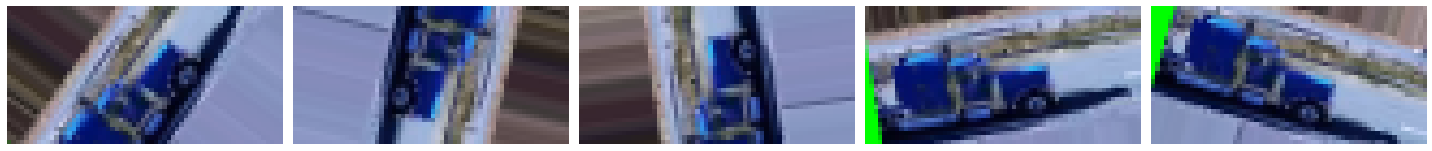

In [10]:
plot_images_from(ImageDataGenerator(rescale=1./255, rotation_range=135))

## 2. Width Shifting
We can apply the `width_shift_range` technique to shift the image in the x-direction and we can specify a floating-point number between 0.0 to 1.0 which tell us the upper bound of the fraction of total width by which is image is randomly shifted either in right or left direction.

Found 2400 validated image filenames belonging to 6 classes.


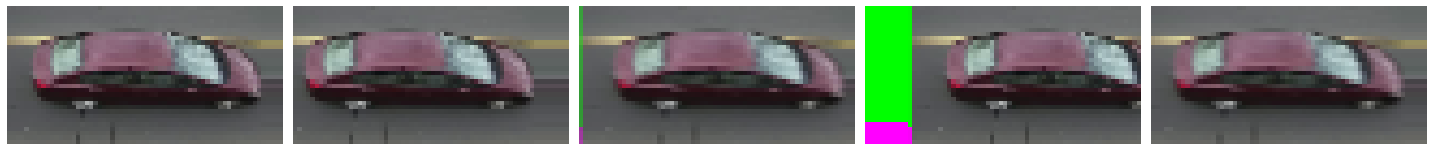

In [11]:
plot_images_from(ImageDataGenerator(rescale=1./255, width_shift_range=.15))

## 3. Height Shifting
We can apply the `height_shift_range` technique to shift the image in the y-direction and we can specify a floating-point number between 0.0 to 1.0 which tell us the upper bound of the fraction of total width by which is image is randomly shifted either in the top or bottom direction.

Found 2400 validated image filenames belonging to 6 classes.


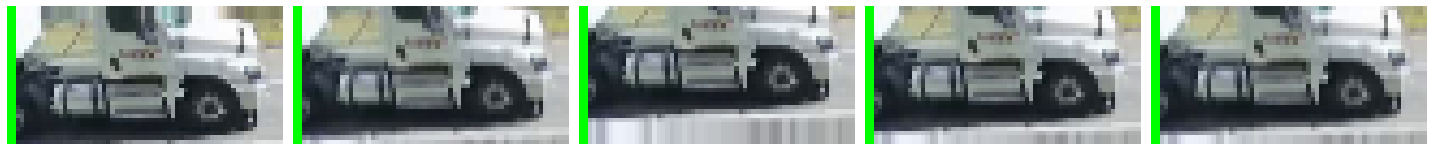

In [12]:
plot_images_from(ImageDataGenerator(rescale=1./255, height_shift_range=.15))

## 4. Brightness
We can apply the `brightness_range` technique for randomly picking a brightness shift value from and we can specify a floating-point number between 0.0 to 1.0 which tell us that 0.0 means no brightness & 1.0 corresponds to maximum brightness.

Found 2400 validated image filenames belonging to 6 classes.


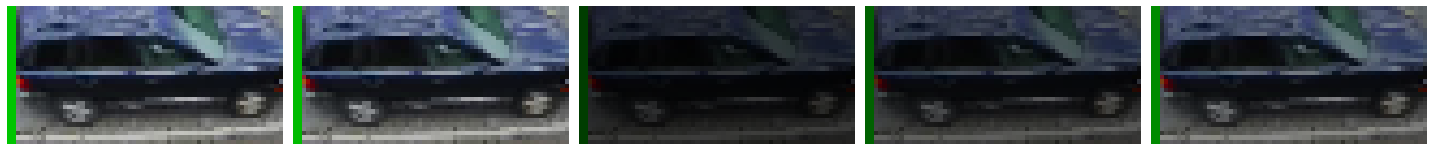

In [13]:
plot_images_from(ImageDataGenerator(rescale=1./255, brightness_range=(0.1,0.9)))

## 5. Shear Intensity
Shear is sometimes also referred to as transvection. A transvection is a function that shifts every point with constant distance in a basis direction(x or y). It slants the shape of the image. Here, we fix one axis and stretch the certain angle known as the shear angle. It stretches the image which is different than the rotation technique. we specify the `shear_range` in the degrees.

Found 2400 validated image filenames belonging to 6 classes.


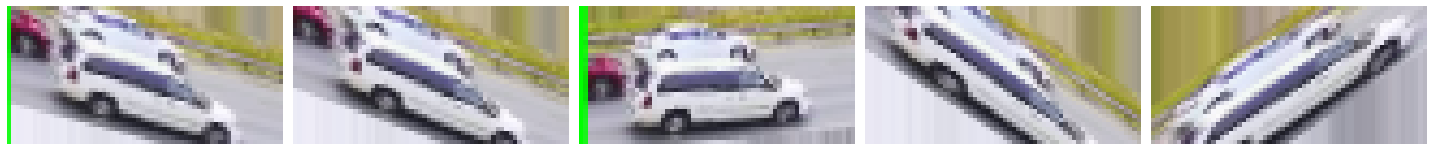

In [14]:
plot_images_from(ImageDataGenerator(rescale=1./255, shear_range=45.0))

## 6. Zoom
We use zoom_range argument to specify the values. If `zoom_range` is less than 1.0 then it magnifies the image and zoom_range greater than 1.0 zooms out of the image.

Found 2400 validated image filenames belonging to 6 classes.


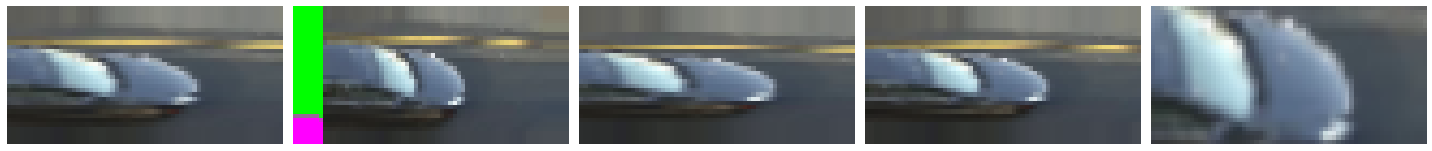

In [15]:
plot_images_from(ImageDataGenerator(rescale=1./255, zoom_range=0.5))

## 7. Channel Shift
It randomly shifts the channel values by a random value chosen from the range. we use `channel_shift_range` parameter to specify the values.

Found 2400 validated image filenames belonging to 6 classes.


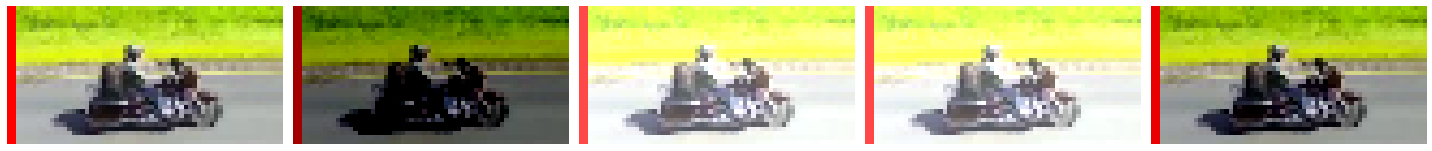

In [16]:
plot_images_from(ImageDataGenerator(rescale=1./255, channel_shift_range=150))

## 8. Horizontal Flip
It flips the images horizontally by specifying the boolean value in the `horizontal_flip` parameter. By specifying true it flips them horizontally.

Found 2400 validated image filenames belonging to 6 classes.


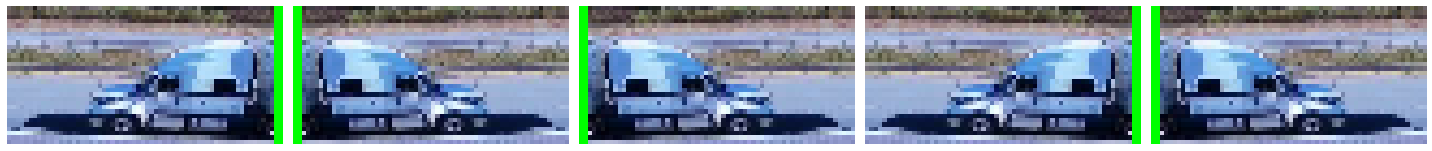

In [17]:
plot_images_from(ImageDataGenerator(rescale=1./255, horizontal_flip=True))

## 9. Vertical Flip
It flips the images vertically by specifying the boolean value in the `vertical_flip parameter`. By specifying true it flips them vertically.

Found 2400 validated image filenames belonging to 6 classes.


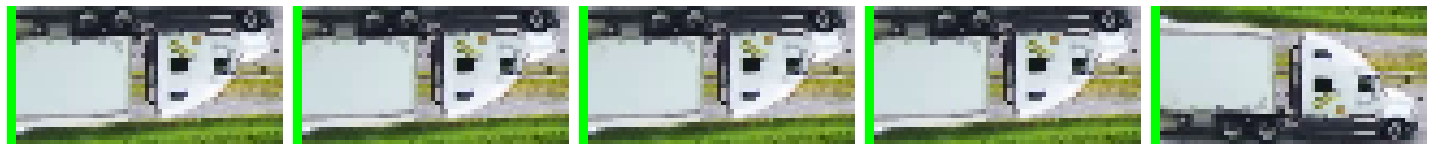

In [18]:
plot_images_from(ImageDataGenerator(rescale=1./255, vertical_flip=True))

# All together

Found 2400 validated image filenames belonging to 6 classes.


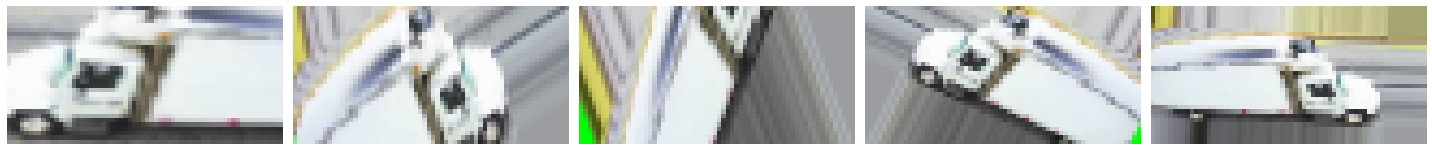

In [19]:
plot_images_from(ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5))

# Fill Mode
If we take an example with `width_shift` which shifts the given image in the left or right direction when the corner pixel values are shifted and to fill the empty values it is filled with some pixel values to maintain the quality of the image. We have several options among which we can choose how we want these regions to be filled. We use `fill_mode` parameter to specify the values.

## 1. Nearest
This is the default option where the closest pixel value is chosen and repeated for all the empty values. (E.g. aaaaaaaa|abcd|dddddddd)

Found 2400 validated image filenames belonging to 6 classes.


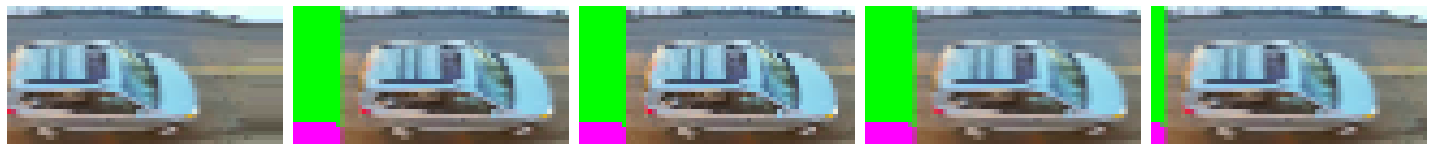

In [20]:
plot_images_from(ImageDataGenerator(rescale=1./255, width_shift_range=.15, fill_mode='nearest'))

## 2. Reflect
This mode creates a ‘reflection’ and fills the empty values in reverse order of the known values. (E.g. abcddcba|abcd|dcbaabcd)

Found 2400 validated image filenames belonging to 6 classes.


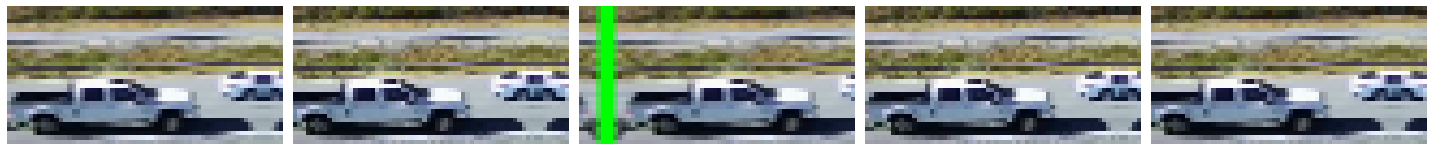

In [21]:
plot_images_from(ImageDataGenerator(rescale=1./255, width_shift_range=.15, fill_mode='reflect'))

## 3. Constant
If we want to fill all the points lying outside the boundaries of the input by a constant value, this mode helps us achieve exactly that. The constant value is specified by the cval argument.

Found 2400 validated image filenames belonging to 6 classes.


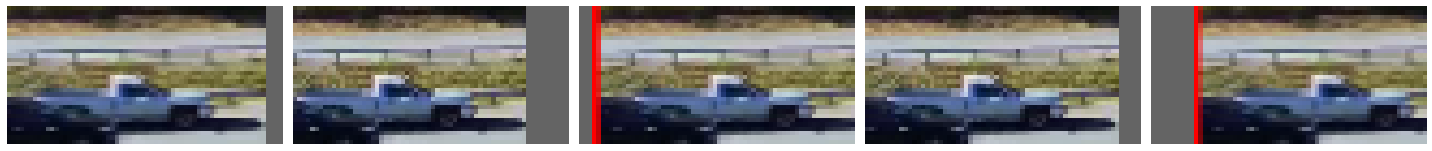

In [22]:
plot_images_from(ImageDataGenerator(rescale=1./255, width_shift_range=.15, fill_mode='constant', cval=100))

## 4. Wrap
Instead of a reflect effect, we can also create a ‘wrap’ effect by copying the values of the known points into the unknown points, keeping the order unchanged. (E.g. abcdabcd|abcd|abcdabcd)

Found 2400 validated image filenames belonging to 6 classes.


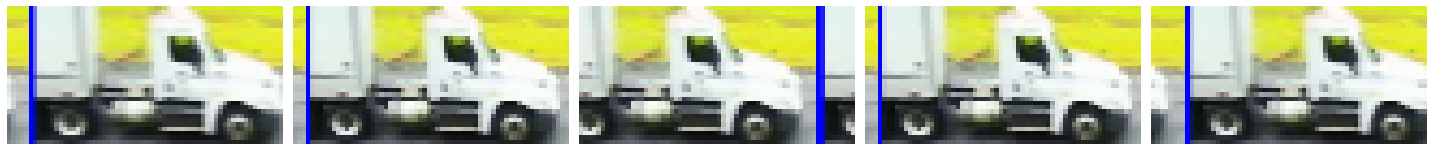

In [23]:
plot_images_from(ImageDataGenerator(rescale=1./255, width_shift_range=.15, fill_mode='wrap'))

# Image Augmentation Performance
In this section, we compare the performance of two convolutional neural networks with identical architecture where one of them will be fitted with augmented samples. First, we create some helper functions. 

In [24]:
def from_image_generator(image_generator):
    train_dg = image_generator.flow_from_dataframe(dataframe=train_df,
                                                     x_col="filename",
                                                     y_col="class",
                                                     subset="training",
                                                     shuffle=True,
                                                     seed=42,
                                                     batch_size=56,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")
    valid_dg = image_generator.flow_from_dataframe(dataframe=train_df,
                                                     x_col="filename",
                                                     y_col="class",
                                                     subset="validation",
                                                     shuffle=True,
                                                     seed=42,
                                                     batch_size=56,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")
    return train_dg, valid_dg

In [25]:
image_generator = ImageDataGenerator(rescale=1./255) 
test_data_gen = image_generator.flow_from_dataframe(dataframe=test_df,
                                                    x_col="filename",
                                                    y_col="class",
                                                    shuffle=False,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode="categorical")

Found 600 validated image filenames belonging to 6 classes.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

def create_model():
    return Sequential([
      Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
      MaxPooling2D(),
      Conv2D(32, 3, padding='same', activation='relu'),
      MaxPooling2D(),
      Conv2D(64, 3, padding='same', activation='relu'),
      MaxPooling2D(),
      Flatten(),
      Dense(512, activation='relu'),
      Dense(6, activation='sigmoid')
    ])

In [27]:
def plot_training_history(h):
    acc = h.history['accuracy']
    loss = h.history['loss']
    
    val_acc = h.history['val_accuracy']
    val_loss = h.history['val_loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.show()

In [28]:
def evaluate_model(m):
    train_eval = m.evaluate_generator(train_data_gen)
    valid_eval = m.evaluate_generator(valid_data_gen)
    test_eval = m.evaluate_generator(test_data_gen)
    print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f' % (train_eval[1]*100, train_eval[0]))
    print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f' % (valid_eval[1]*100, valid_eval[0]))
    print('Test Accuracy      : %1.2f%%     Test loss      : %1.6f' % (test_eval[1]*100, test_eval[0]))

## Model Trained Using Original Data 

Found 2400 validated image filenames belonging to 6 classes.


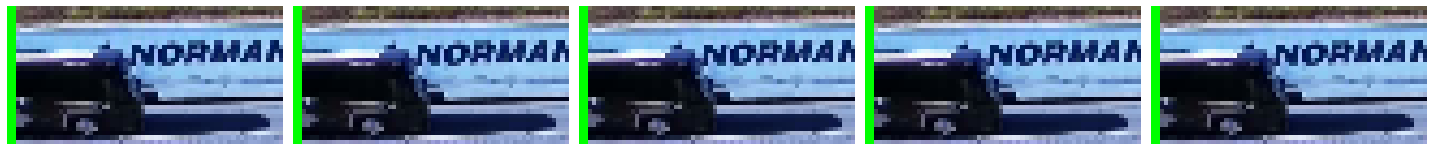

Found 1920 validated image filenames belonging to 6 classes.
Found 480 validated image filenames belonging to 6 classes.


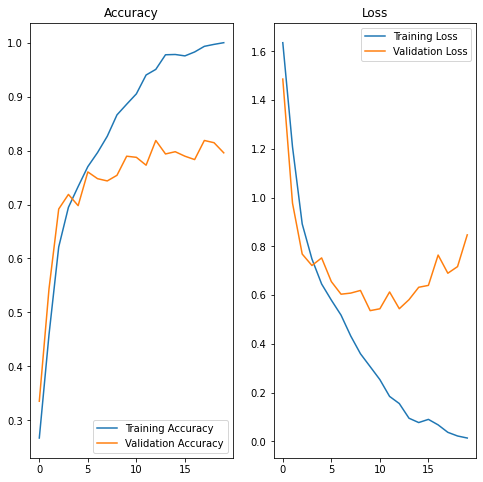

Training Accuracy  : 99.95%     Training loss  : 0.013797
Validation Accuracy: 79.58%     Validation loss: 0.846866
Test Accuracy      : 78.83%     Test loss      : 0.865589


In [34]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) 
plot_images_from(image_generator)

train_data_gen, valid_data_gen = from_image_generator(image_generator)

model = create_model()

model.compile(optimizer=Adam(lr=1e-3),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    validation_data=valid_data_gen,
    epochs=20,
    verbose=0,
)

plot_training_history(history)

evaluate_model(model)

## Model Trained Using Augmented Data 

Found 2400 validated image filenames belonging to 6 classes.


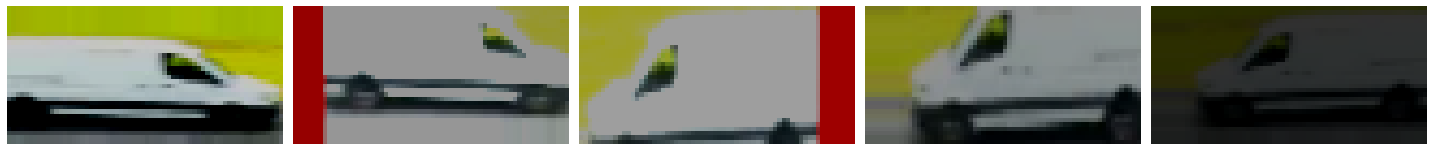

Found 1920 validated image filenames belonging to 6 classes.
Found 480 validated image filenames belonging to 6 classes.


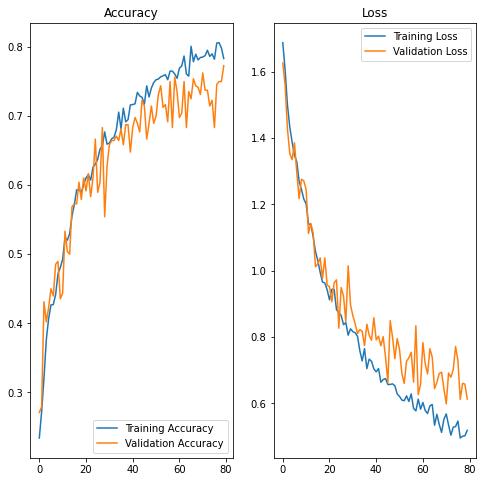

Training Accuracy  : 91.56%     Training loss  : 0.226203
Validation Accuracy: 83.54%     Validation loss: 0.418885
Test Accuracy      : 79.33%     Test loss      : 0.485226


In [33]:
augm_image_generator = ImageDataGenerator(rescale=1./255,
                                         width_shift_range=.15,
                                         height_shift_range=.15,
                                         brightness_range=(0.1,0.9),
                                         zoom_range=0.3,
                                         channel_shift_range=150,
                                         horizontal_flip=True,
                                         validation_split=0.2) 
plot_images_from(augm_image_generator)

train_augm_data_gen, valid_augm_data_gen = from_image_generator(augm_image_generator)

model = create_model()

model.compile(optimizer=Adam(lr=2e-3),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_augm_data_gen,
    validation_data=valid_augm_data_gen,
    epochs=80,
    verbose=0,
)

plot_training_history(history)

evaluate_model(model)

## Conclusion
When the non-augmented model hit it's maximum accuracy at the 10th epochs and started to overfit, the augmented model was training more steady and didn't overfit even in 40 epochs. Enlarging the dataset allows us to train the model longer and achieve better results.

# References
- [tf.keras.preprocessing.image.ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator?version=stable)
- [Image Data Augmentation- Image Processing In TensorFlow](https://medium.com/mlait/image-data-augmentation-image-processing-in-tensorflow-part-2-b77237256df0)
- [Image classification](https://www.tensorflow.org/tutorials/images/classification)